# Get Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
cp_df = pd.read_csv("CarPrice_Data.csv")

# Data Cleaning and Wrangling Process

In [3]:
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
cp_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
cp_df.duplicated().sum()

0

In [6]:
cp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
cp_df.count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [8]:
cp_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='wheelbase', ylabel='Count'>

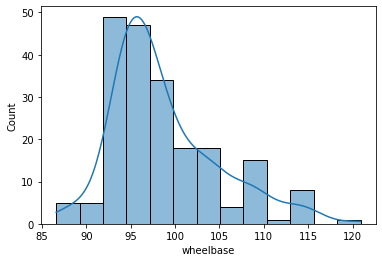

In [9]:
sns.histplot(x= "wheelbase", data=cp_df, kde=True)
#this feature is positively skewed which signals the presence of an outlier, we need another analysis to confirm this.

<AxesSubplot:xlabel='wheelbase'>

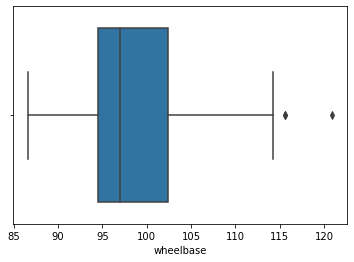

In [10]:
sns.boxplot(x="wheelbase",data= cp_df)
#this boxplot confirms that there is an outlier in the wheel base feature

<AxesSubplot:xlabel='curbweight', ylabel='Count'>

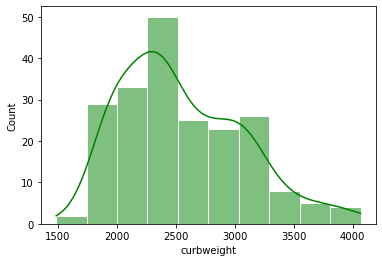

In [11]:
sns.histplot(x= "curbweight",color= "green",edgecolor= "white", data=cp_df, kde=True)
#this curve seem a little bit confusing as to whether it is normally distributed or positively skewed, a boxplot will be need 
#for confirmation

<AxesSubplot:xlabel='curbweight'>

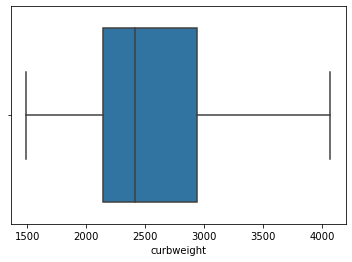

In [12]:
sns.boxplot(x="curbweight",data= cp_df)
#this boxplot show there are no outliers, and since the left and right whiskers are not equal, it confirms that the feature is 
#skewed.

<AxesSubplot:xlabel='enginesize', ylabel='Count'>

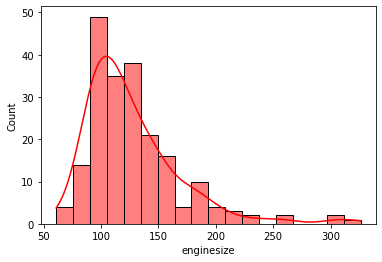

In [13]:
sns.histplot(x= "enginesize",color= "red",edgecolor= "black", data=cp_df, kde=True)
#positively skewed, this implies the presence of an outlier, these outliers bias the mean and infliate the standard deviation
#hence the reason for the skewness of the variable

<AxesSubplot:xlabel='enginesize'>

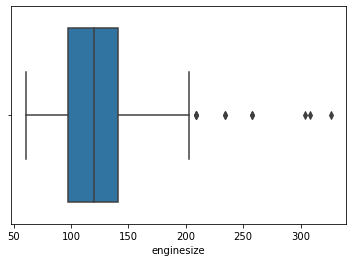

In [14]:
sns.boxplot(x="enginesize",data= cp_df)
#a boxplot to further buttress the point above

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

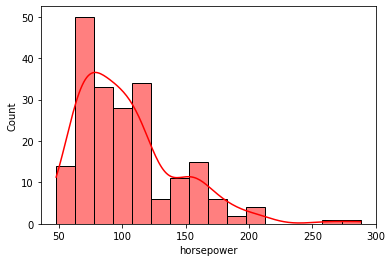

In [15]:
sns.histplot(x= "horsepower",color= "red",edgecolor= "black", data=cp_df, kde=True)
#Positively skewed horsepower feature indicates the presence of and outlier

<AxesSubplot:xlabel='horsepower'>

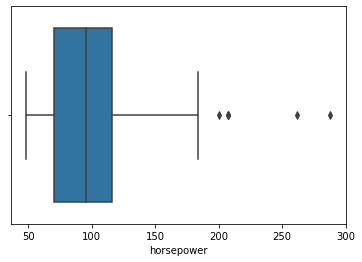

In [16]:
sns.boxplot(x="horsepower",data= cp_df)
#Outliers shown with the boxplot

<AxesSubplot:xlabel='stroke', ylabel='Count'>

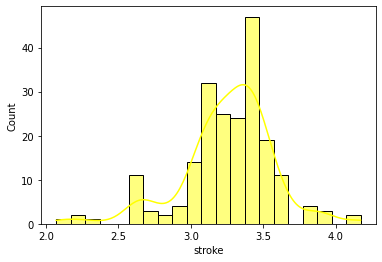

In [17]:
sns.histplot(x= "stroke",color= "yellow",edgecolor= "black", data=cp_df,kde=True)
#Negatively skewed, indicates the presence of an outlier.

<AxesSubplot:xlabel='stroke'>

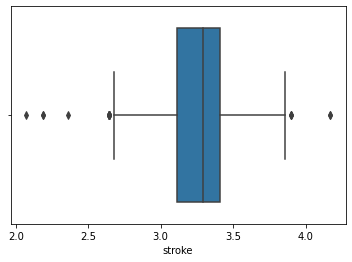

In [18]:
sns.boxplot(x="stroke",data= cp_df)
#this boxplot shows the presence of outliers on the left and right side of the feature, however the presence of outliers are 
#heavier on the left than on the right.

<AxesSubplot:xlabel='fueltype', ylabel='count'>

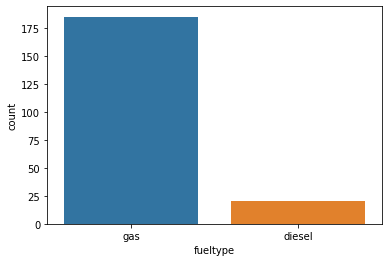

In [19]:
sns.countplot(x= "fueltype", data=cp_df)


<AxesSubplot:xlabel='aspiration', ylabel='count'>

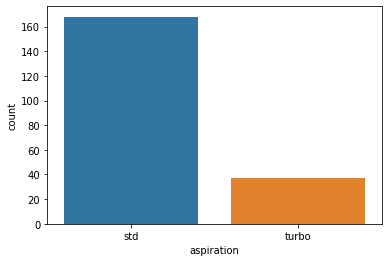

In [20]:
sns.countplot(x="aspiration", data=cp_df)

<AxesSubplot:xlabel='doornumber', ylabel='count'>

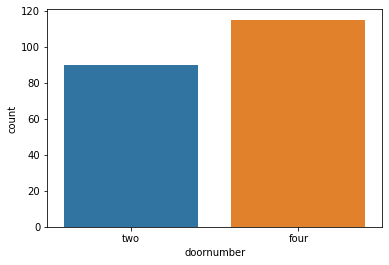

In [21]:
sns.countplot(x="doornumber", data=cp_df)

<AxesSubplot:xlabel='carbody', ylabel='count'>

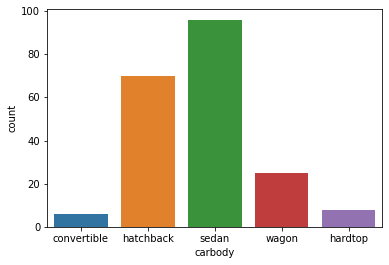

In [22]:
sns.countplot(x="carbody", data=cp_df)

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

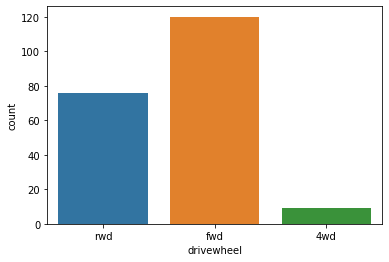

In [23]:
sns.countplot(x="drivewheel", data=cp_df)

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

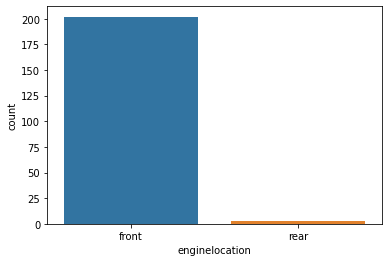

In [24]:
sns.countplot(x="enginelocation", data=cp_df)

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

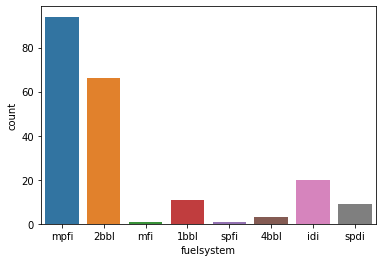

In [25]:
sns.countplot(x="fuelsystem", data=cp_df)

# Univariate Analysis Observations

1. the positive skewedness of wheelbase, curbweight,engine size and horsepower feature implies that the investors are prone to making more 
profit and less losses if the car price are hinged on these features.


2. the negative skewedness of stroke feature implies that more losses will be made if the car price feature depended on the stroke.


3. Gas is the most used fuel type, so the investors might want to consider assembling more gas cars.


4. std car aspirator,cars with four doors, sedan carbody, fwd drivewheel, front engine location, mpfi fuel system cars are prone to more sales and should be considered when manufacturing the cars.

# Bivariate Analysis

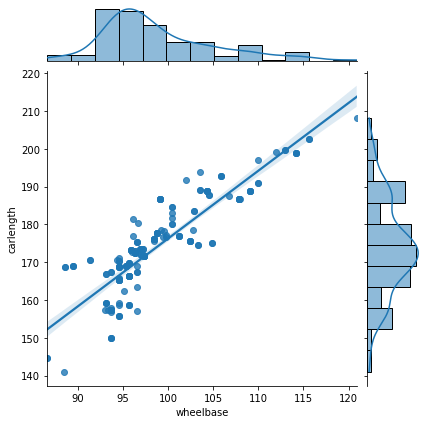

In [26]:
sns.jointplot(x='wheelbase',y='carlength',data=cp_df,kind='reg')

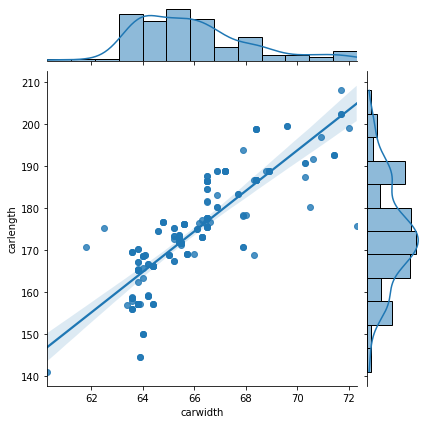

In [27]:
sns.jointplot(x='carwidth',y='carlength',data=cp_df,kind='reg')

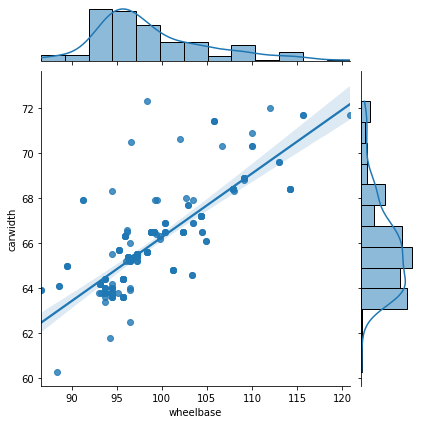

In [28]:
sns.jointplot(x='wheelbase',y='carwidth',data=cp_df,kind='reg')

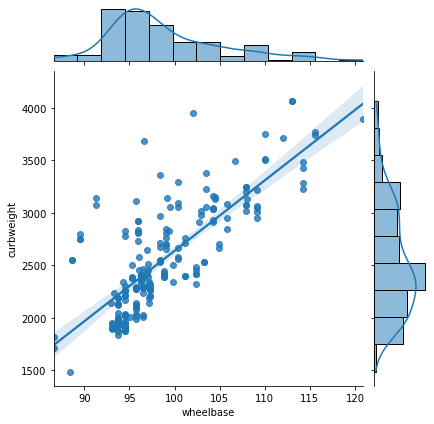

In [29]:
sns.jointplot(x='wheelbase',y='curbweight',data=cp_df,kind='reg')

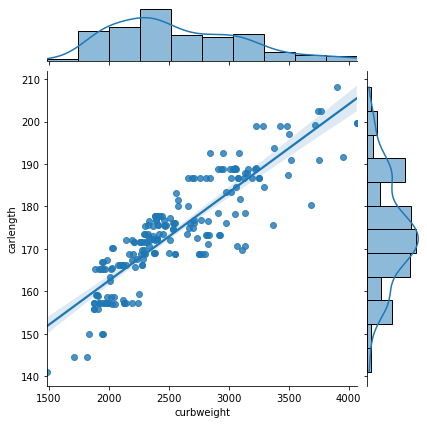

In [30]:
sns.jointplot(x='curbweight',y='carlength',data=cp_df,kind='reg')

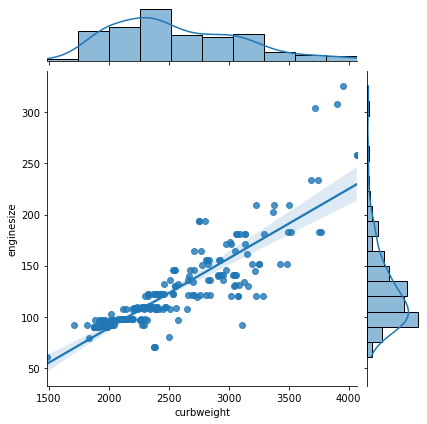

In [31]:
sns.jointplot(x='curbweight',y='enginesize',data=cp_df,kind='reg')

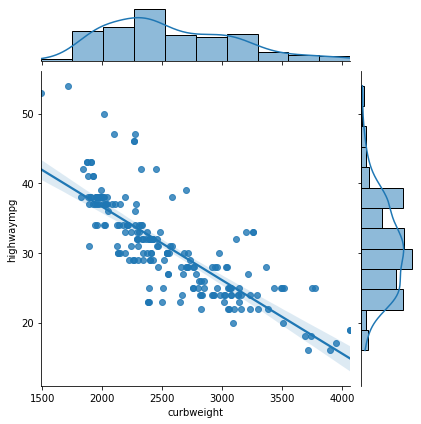

In [32]:
sns.jointplot(x='curbweight',y='highwaympg',data=cp_df,kind='reg')

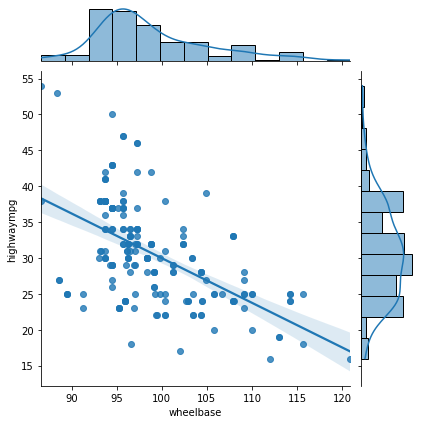

In [33]:
sns.jointplot(x='wheelbase',y='highwaympg',data=cp_df,kind='reg')

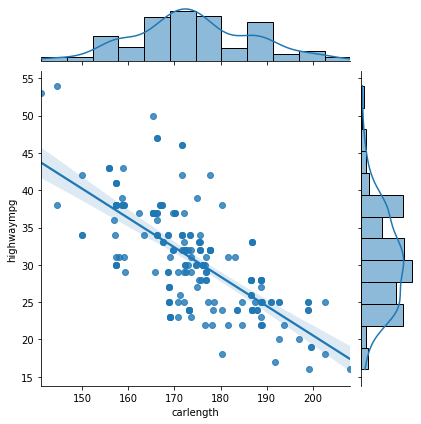

In [34]:
sns.jointplot(x='carlength',y='highwaympg',data=cp_df,kind='reg')

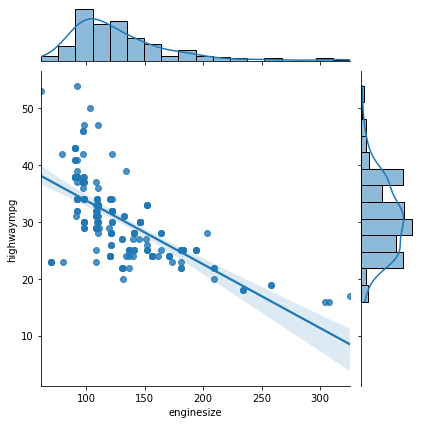

In [35]:
sns.jointplot(x='enginesize',y='highwaympg',data=cp_df,kind='reg')

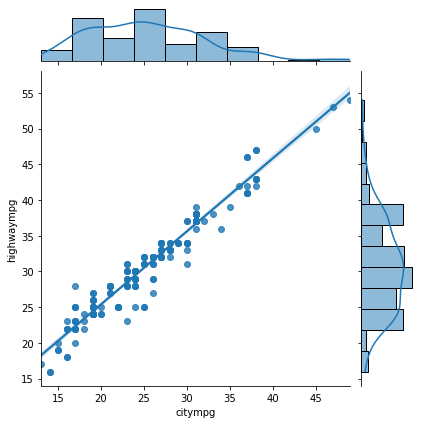

In [36]:
sns.jointplot(x='citympg',y='highwaympg',data=cp_df,kind='reg')

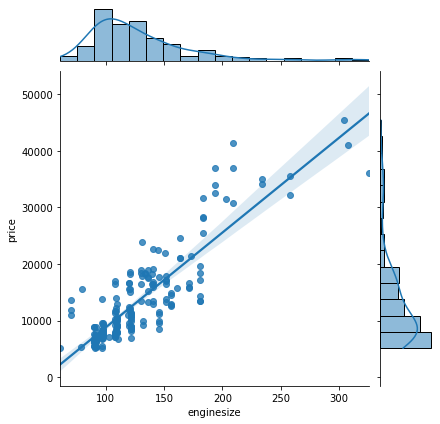

In [37]:
sns.jointplot(x='enginesize',y='price',data=cp_df,kind='reg')

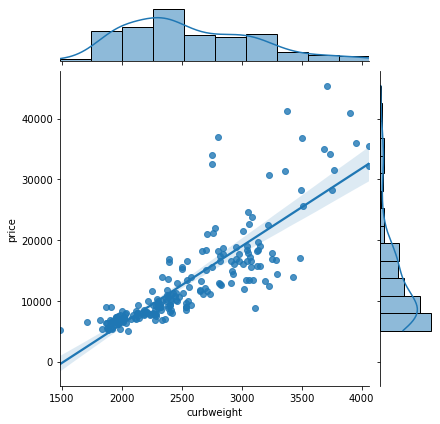

In [38]:
sns.jointplot(x='curbweight',y='price',data=cp_df,kind='reg')

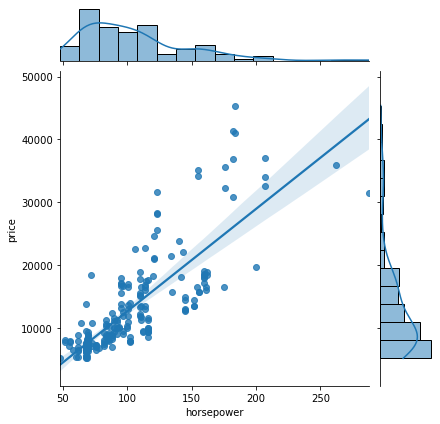

In [39]:
sns.jointplot(x='horsepower',y='price',data=cp_df,kind='reg')

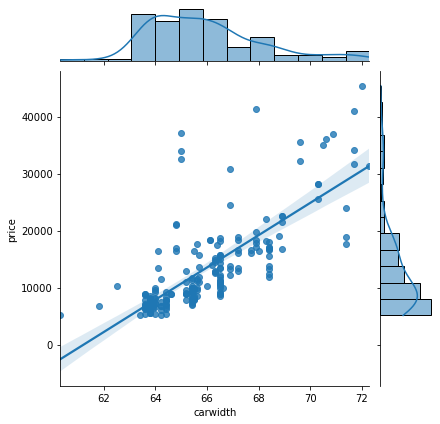

In [40]:
sns.jointplot(x='carwidth',y='price',data=cp_df,kind='reg')

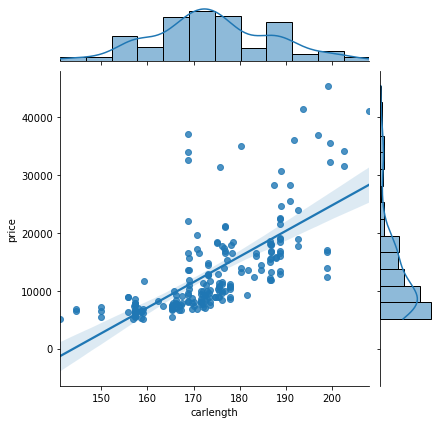

In [41]:
sns.jointplot(x='carlength',y='price',data=cp_df,kind='reg')

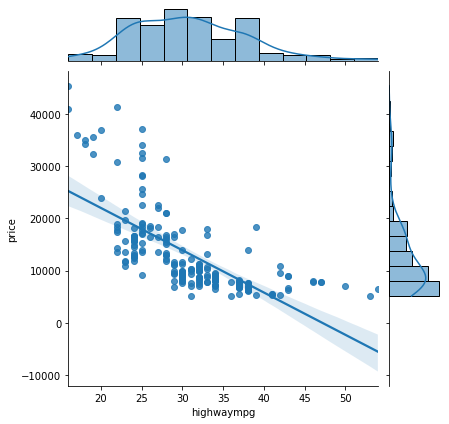

In [42]:
sns.jointplot(x='highwaympg',y='price',data=cp_df,kind='reg')

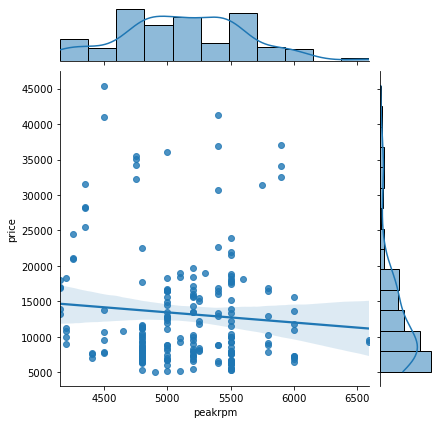

In [43]:
sns.jointplot(x='peakrpm',y='price',data=cp_df,kind='reg')

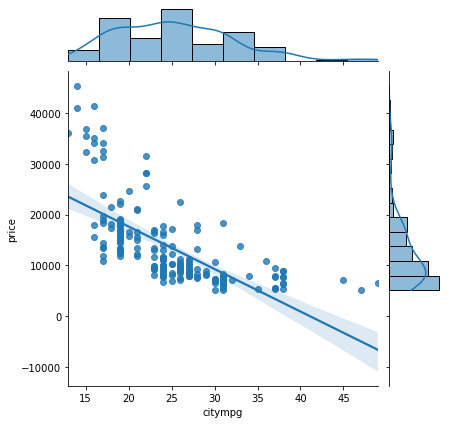

In [44]:
sns.jointplot(x='citympg',y='price',data=cp_df,kind='reg')

# Bivariate Analysis Observations

1. A strong positive correlation is observed between wheelbase and carlength, carlength and carwidth, carwidth and wheelbase
  wheelbase and curbwidth, curbwidth and carlength, and carlength engine size, this implies these features are directly           proportional with each other.

2. A negative correlation is obeserved between highwaympg and curbweight, highwaympg and wheelbase, highwaympg and carlength, 
   highwaympg and enginesize, this implies these features are inversely proportional to each other.
   
3. A near perfect positively correlation is observed between highwaympg and citympg.

4. A  strong positive correlation is observed between price and enginesize, price and curbweight, price and horsepower, price      and carwidth, price and carlength, this gives a pointer to the feather importances, this suggest this features are usefull      in predicting price.

5. A negative correlation is observed between  price and highwaympg, price and peakrpm and price and citympg. these implies       that this feature are not importance for predicting the prices of cars as they are inversely proportional to each other.

# Multivariate Analysis

In [45]:
cp_df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

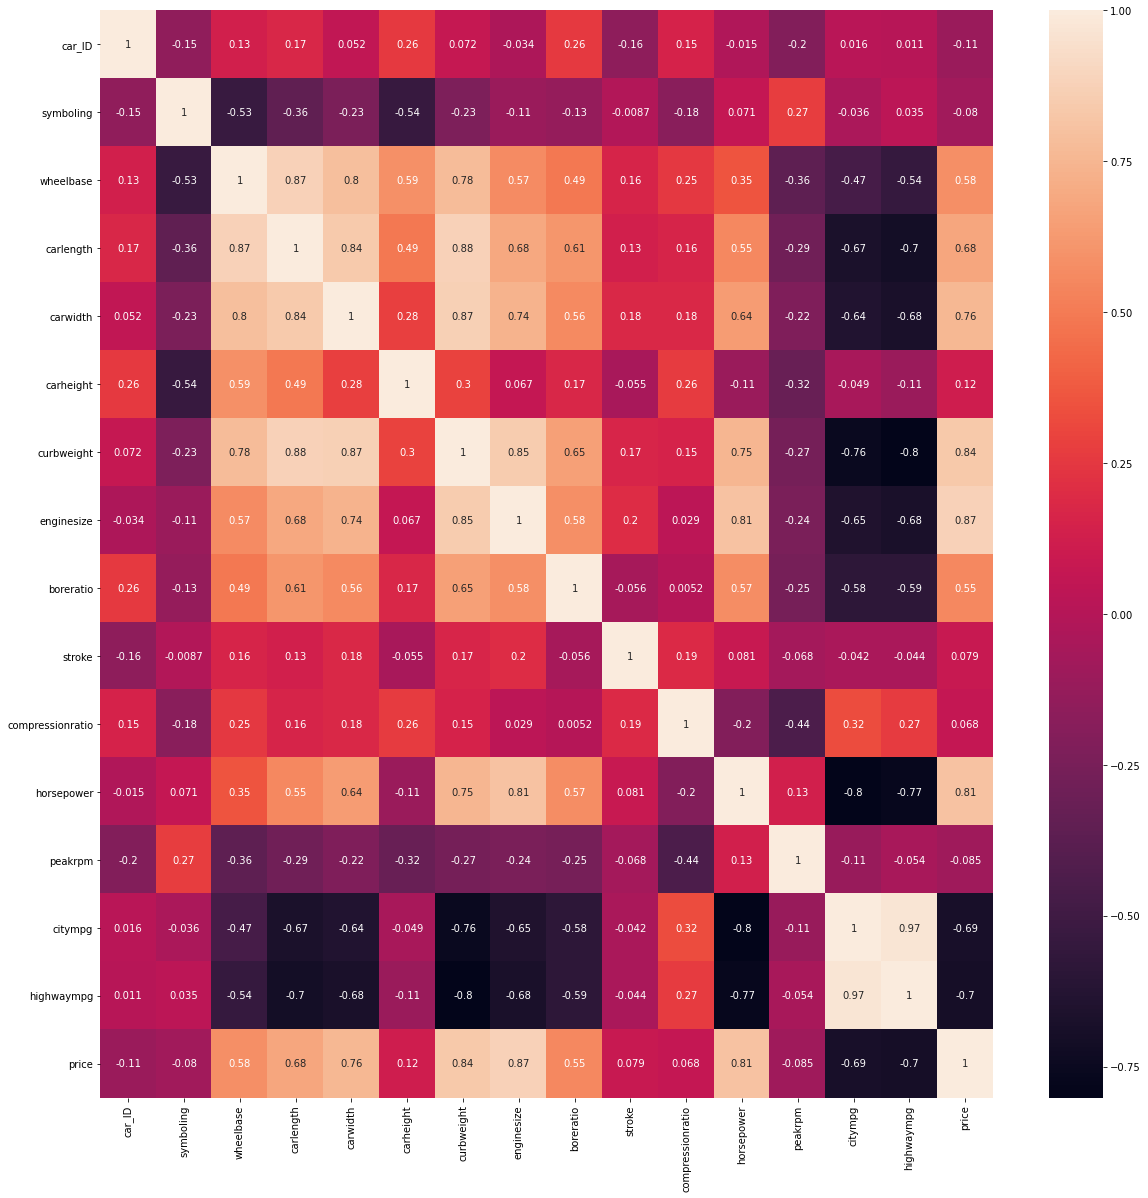

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(cp_df.corr(),annot=True)


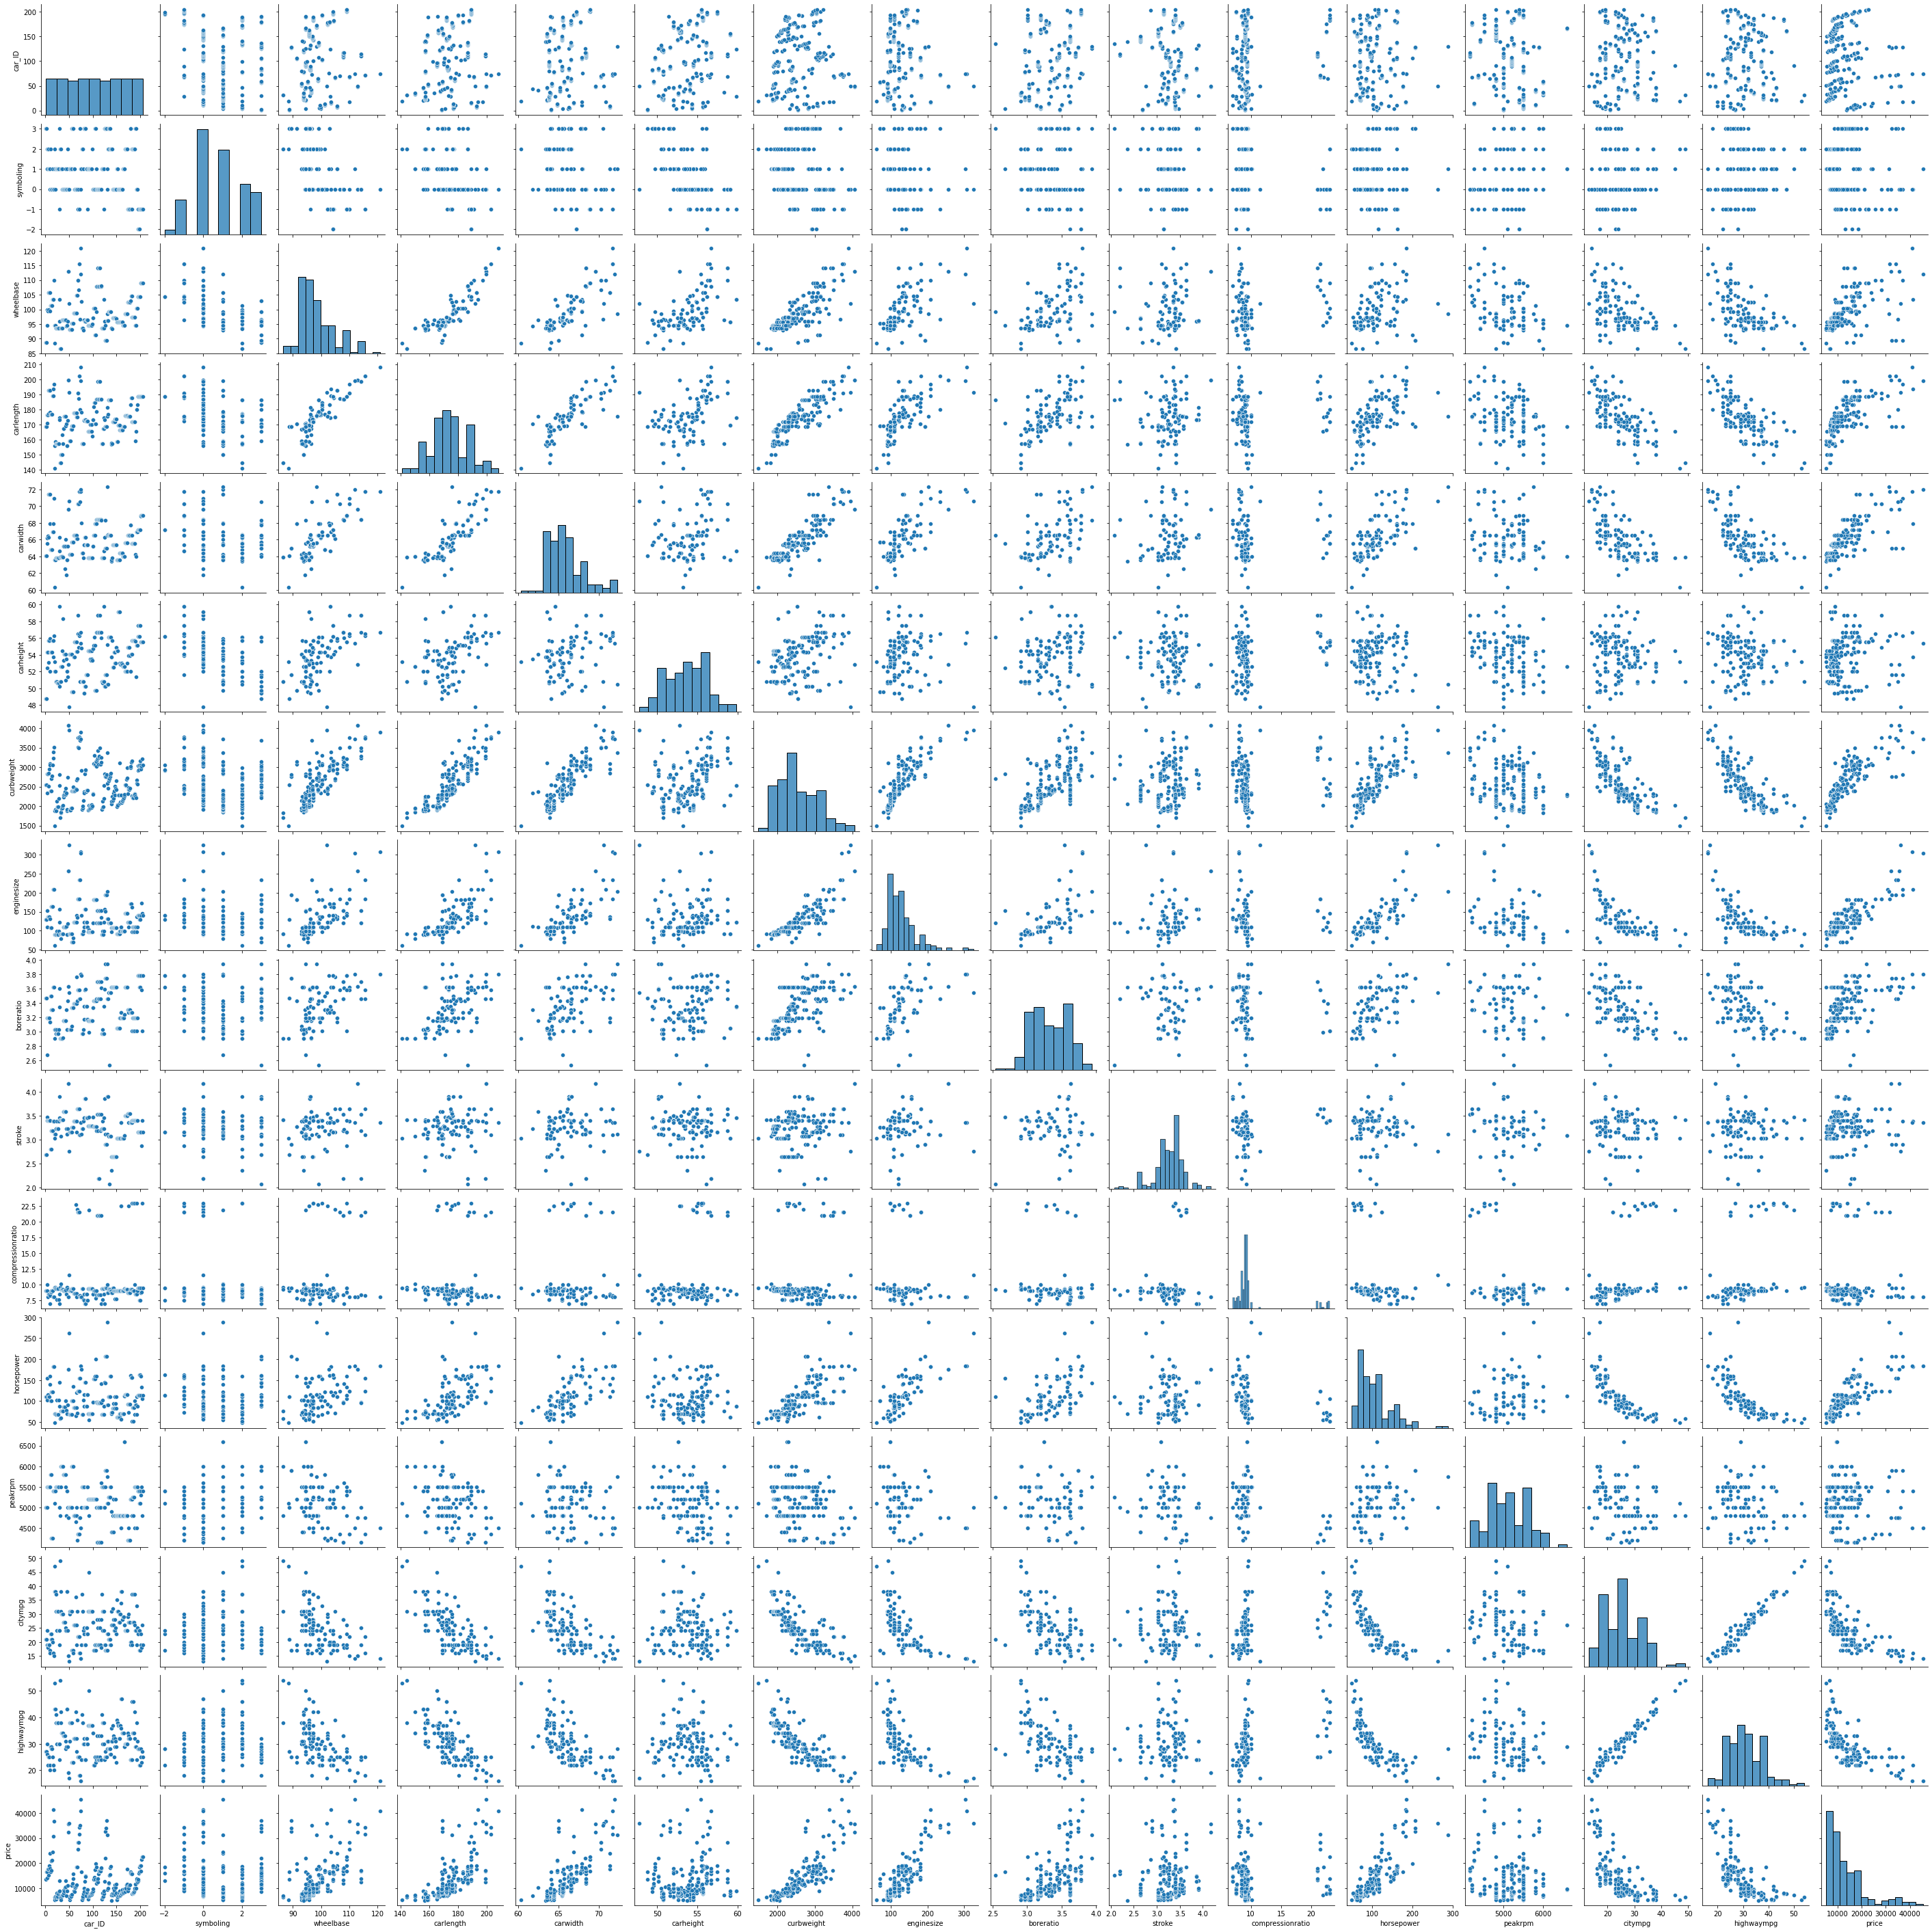

In [47]:
sns.pairplot(cp_df)

# Multivariate Analysis Observation

The multivariate analysis shows the correlation level between all vaiables and also gives the distribution shape of each vairable in the pair plot.

# FEATURE ENGINEERING

In [48]:
#first step is to make a copy of the data set to ensure that the changes made do not affect the original dataframe
new_copy=cp_df.copy()
new_copy


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [49]:
# Engineering the car name feature
new_copy['CarName'].value_counts()

peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
honda civic                 3
                           ..
volkswagen type 3           1
volkswagen rabbit           1
subaru brz                  1
plymouth fury gran sedan    1
mazda glc custom l          1
Name: CarName, Length: 147, dtype: int64

In [50]:
# We create a new column "car_company" in our dataset :
new_copy['car_company'] = new_copy['CarName'].apply(lambda x:x.split(' ')[0])
new_copy['car_company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: car_company, dtype: object

In [51]:
new_copy = new_copy.drop(['CarName'], axis =1)

In [52]:
new_copy['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
Nissan          1
toyouta         1
mercury         1
vokswagen       1
Name: car_company, dtype: int64

Correcting some wrong spellings and merging them

In [53]:
new_copy['car_company'].replace('toyouta', 'toyota',inplace=True)
new_copy['car_company'].replace('Nissan', 'nissan',inplace=True)
new_copy['car_company'].replace('maxda', 'mazda',inplace=True)
new_copy['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
new_copy['car_company'].replace('vw', 'volkswagen',inplace=True)
new_copy['car_company'].replace('porcshce', 'porsche',inplace=True)

# ENCODING CATEGORICAL VARIABLES

In [54]:
#Next step is to name the target variable and drop it from the dataframe
encoded_copy= pd.get_dummies(new_copy)
encoded_copy

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,0,0,0,0,1


# SCALING THE DATA

In [55]:
#to split our data into test and train we import the library below
from sklearn.model_selection import train_test_split

In [56]:
x = encoded_copy.drop(['price',"car_ID"], axis=1)
y = encoded_copy['price']


In [57]:
#we split the data set here and into test and train where 30% is assigned to the test value
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.74347043, -1.6907718 , -0.42652147, ..., -0.43008266,
        -0.24935149, -0.23811978],
       [ 1.74347043, -1.6907718 , -0.42652147, ..., -0.43008266,
        -0.24935149, -0.23811978],
       [ 0.133509  , -0.70859588, -0.23151305, ..., -0.43008266,
        -0.24935149, -0.23811978],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.43008266,
        -0.24935149,  4.19956708],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.43008266,
        -0.24935149,  4.19956708],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.43008266,
        -0.24935149,  4.19956708]])

In [59]:
#check the shape of the dataframe after split
x_train.shape, y_train.shape

((143, 74), (143,))

In [60]:
x_test.shape, y_test.shape

((62, 74), (62,))

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model= LinearRegression()

In [63]:
#to fit the model ontop of our dataet
model.fit(x_train,y_train)

LinearRegression()

In [64]:
#print the coefficient and intercept, where each coeffiecient represent each column
print(model.intercept_)
print(model.coef_)

-9441.13862902373
[ 2.62617305e+01  3.22952615e+02 -1.52295844e+02  5.79469632e+02
 -2.11713198e+02  6.52931922e+00  9.92636554e+01 -7.02527854e+03
 -1.01042148e+03 -1.16654808e+03 -1.99112946e+01  2.07246728e+00
 -6.31170586e+01  8.13264221e+01  4.87135637e+03 -4.87135637e+03
 -9.37967054e+02  9.37967054e+02  5.52917178e+02 -5.52917178e+02
  3.35916811e+03 -5.21954592e+02 -7.40602034e+02 -6.63755654e+02
 -1.43285583e+03 -1.25724536e+03 -8.48345640e+01  1.34207993e+03
 -5.18996781e+03  5.18996781e+03 -5.46327237e+02  9.09494702e-13
 -2.86658980e+03 -3.36261640e+02  3.16120544e+03 -2.99549098e+03
  3.58346423e+03 -1.59246353e+03 -3.65901574e+03  6.59809889e+02
 -1.25276938e+03  5.68434189e-12  2.26097453e+03  3.58346423e+03
 -2.37020333e+03  4.53655722e+02 -1.95309693e+03  4.87135637e+03
 -4.43437980e+02 -1.99061534e+02 -1.62938370e+03  1.27017138e+03
  7.68228531e+02  2.20296275e+03  6.75134003e+03  5.09917023e+03
 -2.08053545e+03 -4.10576774e+03 -1.58776241e+02 -2.80782524e+03
 -7.293

In [65]:
#to compute the r squared score, r squared range between 0 & 1, an r rsquared score close to 1 is good
print(model.score(x_train,y_train))

0.9772977112770178


In [66]:
#To check our predictions
predictions = model.predict(x_test)

In [67]:
predictions

array([ 6372.2006058 , 16624.53259376, 12874.08785313, -3379.78029745,
        9496.06933394, 11192.70451017,  5838.40644212,  4821.99438615,
       15948.00276954,  8339.19972   , 20806.97583825, 26284.23602424,
       12728.67670196, 14875.27319959,  6621.01176789, 10138.30420819,
       10353.33052217, 18100.3664928 ,  8688.506109  ,  7801.98322258,
        9332.35583593, 14456.29589465, 10984.07389568, 11202.58324033,
       17489.07535081,  6665.44247227,  7341.74324406, 15234.94493365,
        7457.19644168,  5688.62228599,  8842.70339338, 11982.19679099,
       19518.28785548,  9336.06250511,  7114.39328393, 29508.63223923,
       14222.32364397, 14935.10918837,  4665.38859138, 37090.68282737,
        5312.91296949, 14961.47812931, 34878.2666399 , 20809.38166592,
       11802.38841795,  7665.18360203,  6628.22503951, 13067.98774859,
       11119.55493013, 10379.47281798, 20845.6994903 ,  7264.06407444,
        7182.6472553 ,  9783.38059249, 16921.76808502, 17702.89109091,
      

In [68]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [69]:
score=r2_score(predictions, y_test)
mae= mean_absolute_error(predictions,y_test)
mse= mean_squared_error(predictions,y_test)
rmse=np.sqrt(mse)

In [70]:
print(score)
print(mae)
print(mse)
print(rmse)

0.8469313317919869
1749.1263219931814
7708086.500774825
2776.3440890449483


<AxesSubplot:xlabel='price'>

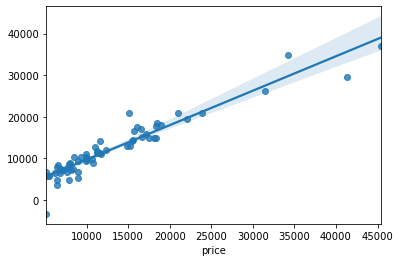

In [71]:
sns.regplot(x= y_test, y= predictions)

<AxesSubplot:xlabel='price', ylabel='Count'>

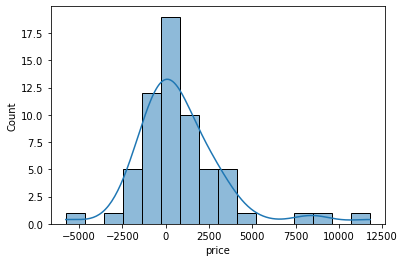

In [72]:
#residuals
sns.histplot((y_test-predictions),kde= True)

The Residual plot is skewed, i would be treating outliers and multicolinearity then trying the linear regression again to see if there is an improvement.

# Outlier and Multicollinearity Treatment of the Data.

Outlier detection using boxplots

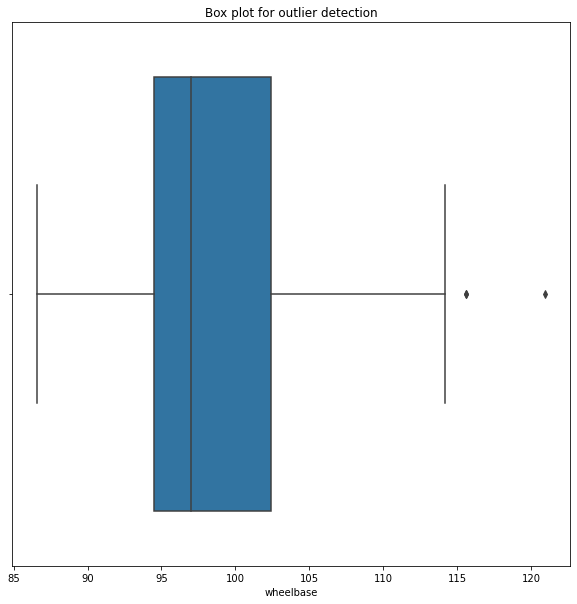

In [73]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["wheelbase"])

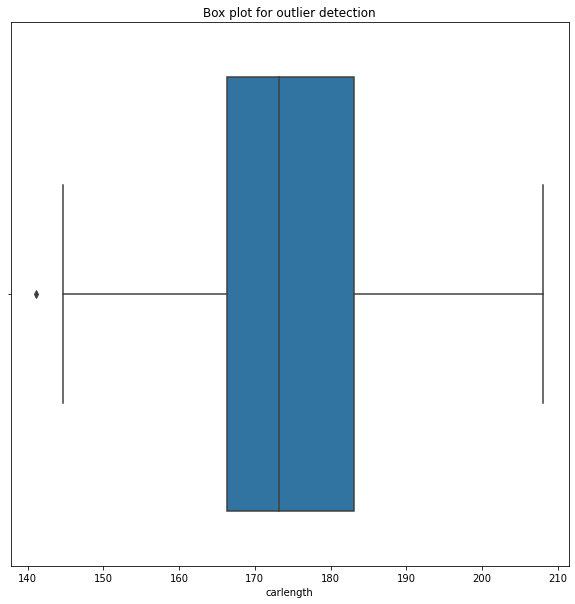

In [74]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["carlength"])

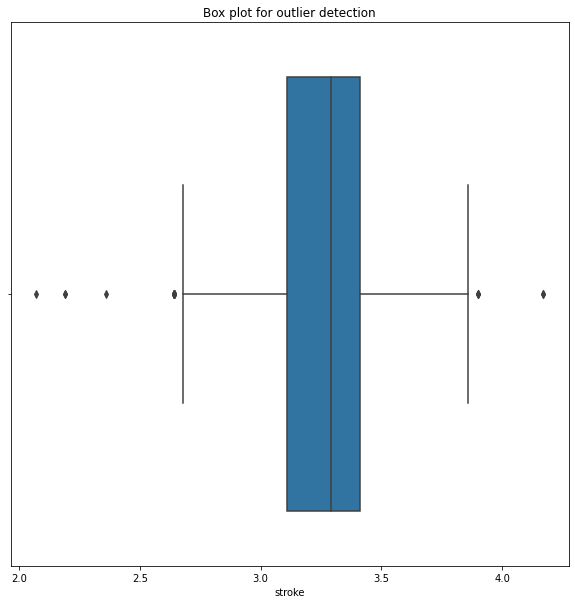

In [75]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["stroke"])

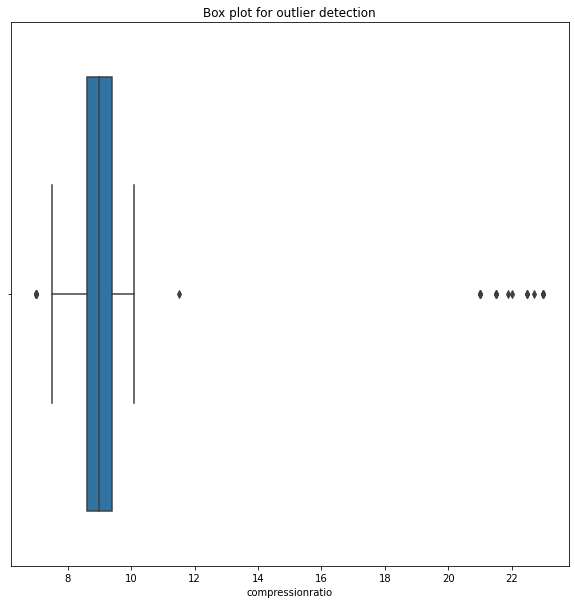

In [76]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["compressionratio"])

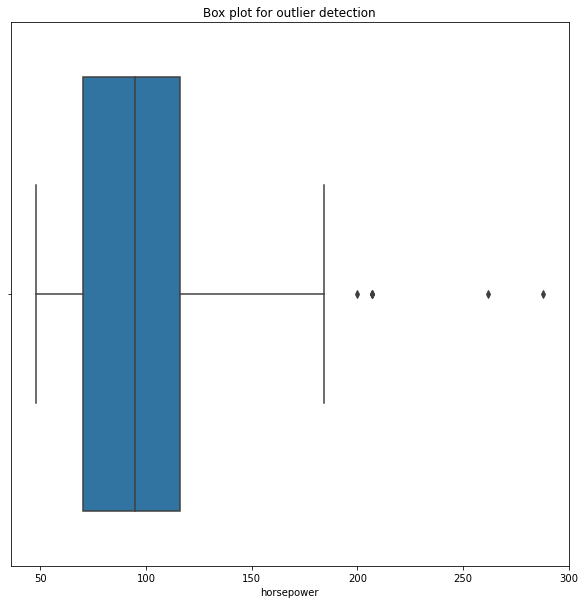

In [77]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["horsepower"])

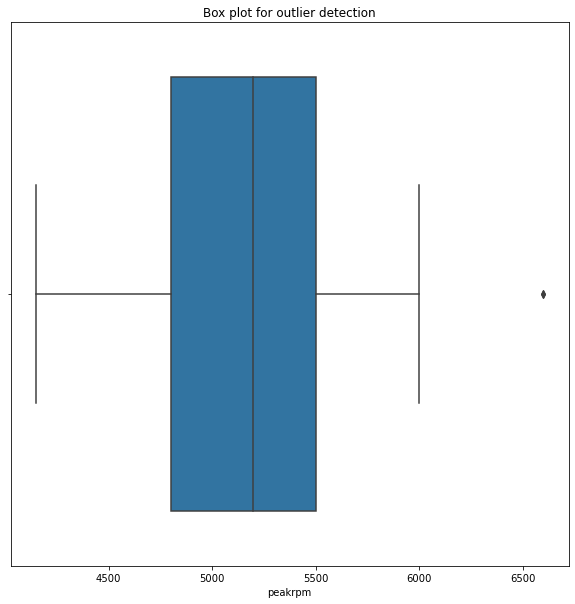

In [78]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["peakrpm"])

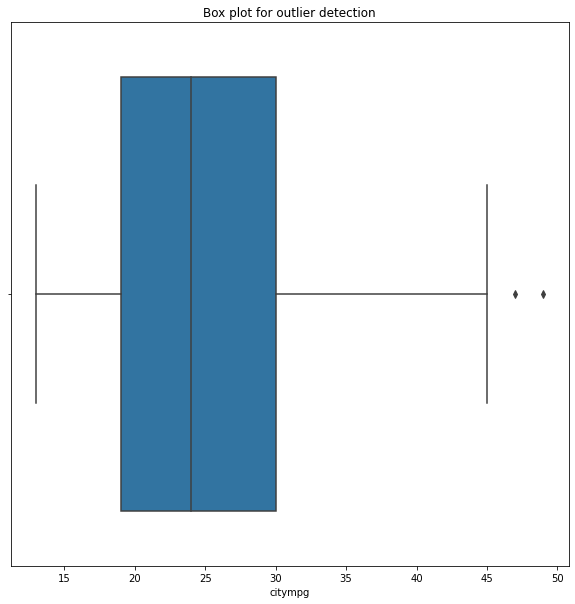

In [79]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["citympg"])

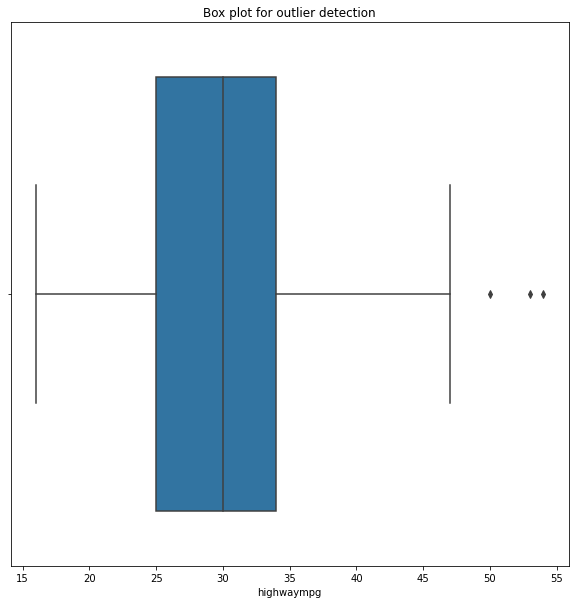

In [80]:
def Box_plots(new_copy):
    plt.figure(figsize=(10,10))
    plt.title("Box plot for outlier detection")
    sns.boxplot(new_copy)
    plt.show()
Box_plots(new_copy["highwaympg"])

wheelbase,carlength, stroke,compressionratio,horsepower, peakrpm,citympg and highwaympg all have outliers.

# Treating Outliers Using Mean Imputation Method

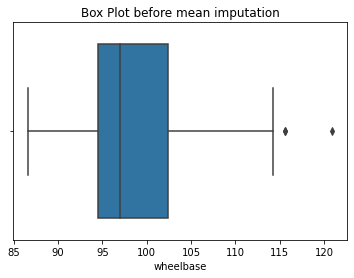

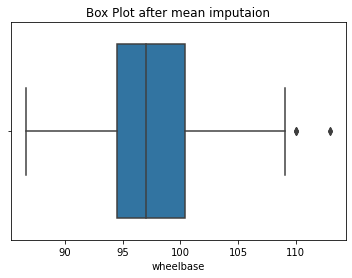

In [81]:
#Treating the outlier using Mean imputation method
new_copy_2=new_copy.copy()
sns.boxplot(new_copy_2["wheelbase"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["wheelbase"]:
    q1= new_copy_2["wheelbase"].quantile(0.25)
    q3= new_copy_2["wheelbase"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["wheelbase"]= new_copy_2["wheelbase"].replace(i, np.mean(new_copy_2["wheelbase"]))
sns.boxplot(new_copy_2["wheelbase"])
plt.title("Box Plot after mean imputaion")
plt.show()

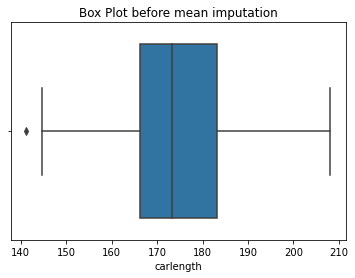

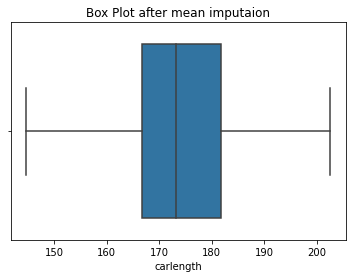

In [82]:

sns.boxplot(new_copy_2["carlength"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["carlength"]:
    q1= new_copy_2["carlength"].quantile(0.25)
    q3= new_copy_2["carlength"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["carlength"]= new_copy_2["carlength"].replace(i, np.mean(new_copy_2["carlength"]))
sns.boxplot(new_copy_2["carlength"])
plt.title("Box Plot after mean imputaion")
plt.show()

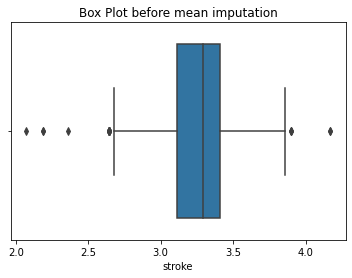

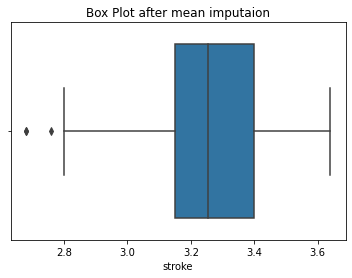

In [83]:

sns.boxplot(new_copy_2["stroke"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["stroke"]:
    q1= new_copy_2["stroke"].quantile(0.25)
    q3= new_copy_2["stroke"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["stroke"]= new_copy_2["stroke"].replace(i, np.mean(new_copy_2["stroke"]))
sns.boxplot(new_copy_2["stroke"])
plt.title("Box Plot after mean imputaion")
plt.show()

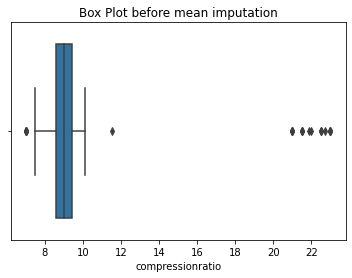

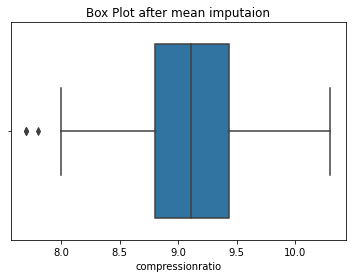

In [84]:

sns.boxplot(new_copy_2["compressionratio"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["compressionratio"]:
    q1= new_copy_2["compressionratio"].quantile(0.25)
    q3= new_copy_2["compressionratio"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["compressionratio"]= new_copy_2["compressionratio"].replace(i, np.mean(new_copy_2["compressionratio"]))
sns.boxplot(new_copy_2["compressionratio"])
plt.title("Box Plot after mean imputaion")
plt.show()

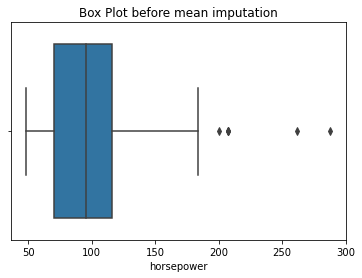

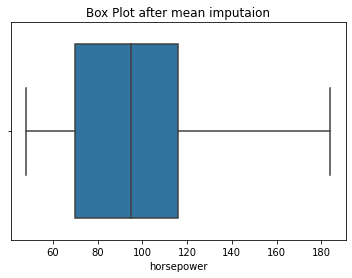

In [85]:

sns.boxplot(new_copy_2["horsepower"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["horsepower"]:
    q1= new_copy_2["horsepower"].quantile(0.25)
    q3= new_copy_2["horsepower"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["horsepower"]= new_copy_2["horsepower"].replace(i, np.mean(new_copy_2["horsepower"]))
sns.boxplot(new_copy_2["horsepower"])
plt.title("Box Plot after mean imputaion")
plt.show()

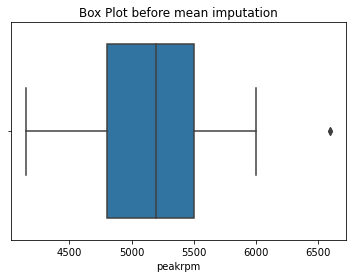

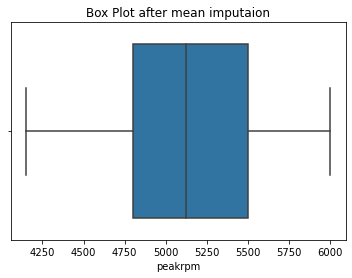

In [86]:

sns.boxplot(new_copy_2["peakrpm"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["peakrpm"]:
    q1= new_copy_2["peakrpm"].quantile(0.25)
    q3= new_copy_2["peakrpm"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["peakrpm"]= new_copy_2["peakrpm"].replace(i, np.mean(new_copy_2["peakrpm"]))
sns.boxplot(new_copy_2["peakrpm"])
plt.title("Box Plot after mean imputaion")
plt.show()

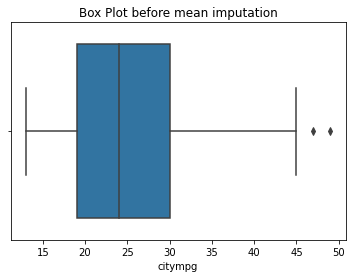

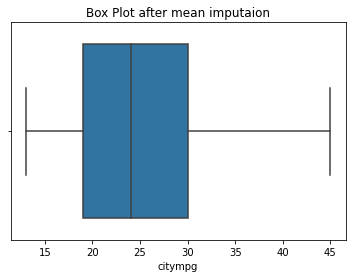

In [87]:

sns.boxplot(new_copy_2["citympg"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["citympg"]:
    q1= new_copy_2["citympg"].quantile(0.25)
    q3= new_copy_2["citympg"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["citympg"]= new_copy_2["citympg"].replace(i, np.mean(new_copy_2["citympg"]))
sns.boxplot(new_copy_2["citympg"])
plt.title("Box Plot after mean imputaion")
plt.show()

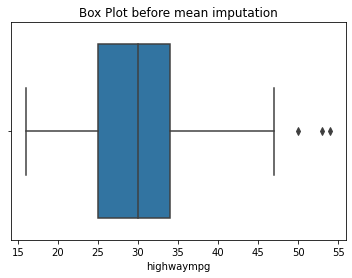

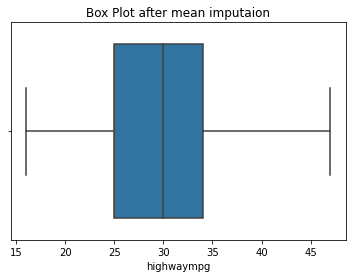

In [88]:

sns.boxplot(new_copy_2["highwaympg"])
plt.title("Box Plot before mean imputation")
plt.show()
for i in new_copy_2["highwaympg"]:
    q1= new_copy_2["highwaympg"].quantile(0.25)
    q3= new_copy_2["highwaympg"].quantile(0.75)
    iqr= q3-q1
    lower_tail=q1- 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        new_copy_2["highwaympg"]= new_copy_2["highwaympg"].replace(i, np.mean(new_copy_2["highwaympg"]))
sns.boxplot(new_copy_2["highwaympg"])
plt.title("Box Plot after mean imputaion")
plt.show()

# Outliers Treatment Done

# Multicollinearity session

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#first of all we get dummies for all the features, to enable the model work on the categorical variables too
encoded_copy_2= pd.get_dummies(new_copy_2)
#select all independent variables
encoded_copy_2[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke",
                "highwaympg","citympg","compressionratio","horsepower","peakrpm",
                "car_company_nissan","car_company_peugeot","car_company_plymouth","car_company_porsche","car_company_renault"
                ,"car_company_saab","car_company_subaru","car_company_toyota","car_company_volkswagen","car_company_volvo",
               ]]
#set the independet variable
X=encoded_copy_2[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke",
                  "highwaympg","citympg","compressionratio","horsepower","peakrpm",
                "car_company_nissan","car_company_peugeot","car_company_plymouth","car_company_porsche","car_company_renault"
                ,"car_company_saab","car_company_subaru","car_company_toyota","car_company_volkswagen","car_company_volvo",
                 ]]
#VIF dataframe
vif_encoded_copy_2= pd.DataFrame()
vif_encoded_copy_2["feature"] = X.columns
#calculating VIF for each feature
vif_encoded_copy_2["VIF"]=[variance_inflation_factor(X.values,i)
                                 for i in range(len(X.columns))]
print (vif_encoded_copy_2)


                   feature          VIF
0                symboling     3.724332
1                wheelbase  1625.422178
2                carlength  1439.686807
3                 carwidth  3316.682442
4                carheight   995.634375
5               curbweight   369.564642
6               enginesize    70.066224
7                boreratio   514.404492
8                   stroke   476.388971
9               highwaympg   297.201533
10                 citympg   232.291534
11        compressionratio   336.958512
12              horsepower    57.277017
13                 peakrpm   258.859248
14      car_company_nissan     1.327560
15     car_company_peugeot     1.979351
16    car_company_plymouth     1.119778
17     car_company_porsche     1.874310
18     car_company_renault     1.092839
19        car_company_saab     1.596544
20      car_company_subaru     1.903218
21      car_company_toyota     1.737808
22  car_company_volkswagen     1.465915
23       car_company_volvo     2.057524


wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,highwaympg,citympg,compressionratio,horsepower,
peakrpm has a significantly high multicolinearity and it needs to be corrected

# Correcting Multicollinearity

The whole essence of this is to make predictions and not for coefficient basically, Multicollinearity checks if all independent variable is held constant a change in 1 independent variable should not cause a change in the rest, hence multicollinearity affects the co-efficient, for the sake of this correcting i will be dropping of carwidth feature because of its high multicollinearity. if we were forced on the co-efficients a deeper correcting method would be employed.

# Linear regression after treatment

In [90]:
encoded_copy_2= pd.get_dummies(new_copy_2)

In [91]:
x = encoded_copy_2.drop(['price',"car_ID","carwidth"], axis=1)
y = encoded_copy_2['price']


In [92]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [93]:
scaler = StandardScaler()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.74347043, -1.90190628, -0.44244395, ..., -0.43008266,
        -0.24935149, -0.23811978],
       [ 1.74347043, -1.90190628, -0.44244395, ..., -0.43008266,
        -0.24935149, -0.23811978],
       [ 0.133509  , -0.72190928, -0.23997867, ..., -0.43008266,
        -0.24935149, -0.23811978],
       ...,
       [-1.47645244,  2.19808329,  1.24476672, ..., -0.43008266,
        -0.24935149,  4.19956708],
       [-1.47645244,  2.19808329,  1.24476672, ..., -0.43008266,
        -0.24935149,  4.19956708],
       [-1.47645244,  2.19808329,  1.24476672, ..., -0.43008266,
        -0.24935149,  4.19956708]])

In [94]:
#check the shape to confirm our manipulations
x_train.shape, y_train.shape


((143, 73), (143,))

In [95]:
x_test.shape, y_test.shape

((62, 73), (62,))

In [96]:
model= LinearRegression()

In [97]:
model.fit(x_train,y_train)

LinearRegression()

In [98]:
print(model.intercept_)
print(model.coef_)

36602.82451975249
[-2.25671405e+02  1.21885341e+02 -2.29820448e+01 -1.72281589e+02
  4.76967931e+00  1.50141462e+02 -1.07093310e+04 -2.61211617e+03
 -1.40329150e+03 -2.05095030e+00  1.41277561e+00 -2.29423336e+01
  2.92852373e+01  9.06028002e+01 -9.06028002e+01 -1.37534388e+03
  1.37534388e+03  1.78724243e+02 -1.78724243e+02  2.85211974e+03
 -9.69520880e+02 -4.05281126e+02 -3.83550904e+02 -1.09376683e+03
 -9.50801166e+02 -1.67074952e+02  1.11787612e+03 -4.24850043e+03
  4.24850043e+03 -1.34828211e+03 -5.45696821e-12 -1.49234129e+03
 -1.46704751e+03  3.01696560e+03 -4.23980712e+03  5.53051242e+03
 -3.77396068e+03 -1.92774771e+02  3.97639203e+03 -9.49386936e+02
  1.81898940e-12 -4.59078207e+03  5.53051242e+03 -2.18208642e+03
  1.23290514e+00 -6.12058960e+02  9.06028002e+01 -3.00549948e+02
  2.72879074e+02 -7.54229016e+02  3.48420957e+03 -2.06293980e+03
  3.28763849e+03  6.74864101e+03  7.90339984e+03 -1.59583112e+03
 -3.08856345e+03 -1.31157291e+02 -4.80014074e+03 -1.93759713e+03
 -7.070

In [99]:
print(model.score(x_train,y_train))

0.9735867165424346


In [100]:
predictions = model.predict(x_test)

In [101]:
predictions

array([ 6853.93921271, 16632.19143234, 15795.44200469, -4517.25993846,
        8200.4686805 , 11207.97523063,  5667.40814335,  6039.74203074,
       15328.3957183 ,  7731.71529584, 22198.94466961, 21727.00397985,
       12733.07580173, 11877.29892852,  3649.90878958, 11161.69603389,
       12374.45200468, 17729.84904958,  8893.09039836,  7103.86062354,
       10059.36068269, 14712.53569112, 12604.29365048, 11939.15376085,
       17033.0646268 ,  5615.77290608,  7128.61184893, 13567.79453995,
        7294.923752  ,  6028.75590211,  8525.46937387, 10836.79942827,
       16867.51171176,  9519.44853094,  6619.91867459, 31143.56596561,
       12678.0164581 , 16523.18108088,  5445.60515843, 37493.58318855,
        2899.85012241, 17268.2256277 , 32561.89907001, 22791.62013515,
       14023.57517234,  8331.01744533,  6398.21394575, 13186.92990721,
       13676.01650179,  9197.71669455, 21796.33490415,  7225.44193962,
        8052.75474641,  9834.3449203 , 17720.15363141, 16887.7109684 ,
      

In [102]:
score=r2_score(predictions, y_test)
mae= mean_absolute_error(predictions,y_test)
mse= mean_squared_error(predictions,y_test)
rmse=np.sqrt(mse)

In [103]:
print(score)
print(mae)
print(mse)
print(rmse)

0.7947053749042742
2082.500826980538
10531020.322432311
3245.1533588464367


<AxesSubplot:xlabel='price'>

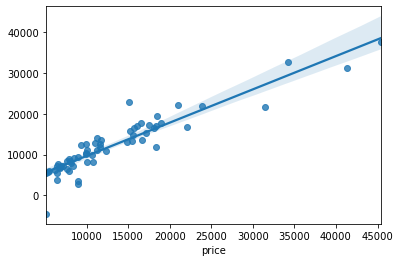

In [104]:
sns.regplot(x= y_test, y= predictions)

<AxesSubplot:xlabel='price', ylabel='Count'>

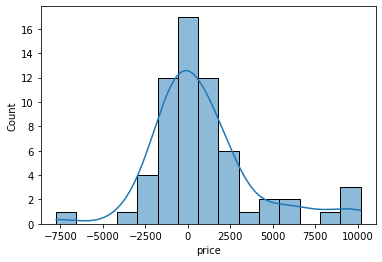

In [105]:
sns.histplot((y_test-predictions),kde= True)

# Trying out another model; Random Forest Regressor

In [106]:
#preparing data for training
x = encoded_copy_2.drop(['price',"car_ID","carwidth"], axis=1)
y = encoded_copy_2['price']


In [107]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [108]:
scaler = StandardScaler()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.74347043, -1.90190628, -0.44244395, ..., -0.43008266,
        -0.24935149, -0.23811978],
       [ 1.74347043, -1.90190628, -0.44244395, ..., -0.43008266,
        -0.24935149, -0.23811978],
       [ 0.133509  , -0.72190928, -0.23997867, ..., -0.43008266,
        -0.24935149, -0.23811978],
       ...,
       [-1.47645244,  2.19808329,  1.24476672, ..., -0.43008266,
        -0.24935149,  4.19956708],
       [-1.47645244,  2.19808329,  1.24476672, ..., -0.43008266,
        -0.24935149,  4.19956708],
       [-1.47645244,  2.19808329,  1.24476672, ..., -0.43008266,
        -0.24935149,  4.19956708]])

In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x_train, y_train)
y_predictions= regressor.predict(x_test)

In [110]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_predictions))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_predictions))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))

Mean Absolute Error: 1577.3932784946237
Mean Squared Error: 5564268.977132151
Root Mean Squared Error: 2358.8702756048606


In [111]:
score=r2_score(y_predictions, y_test)
print(score)

0.8905827311229918


<AxesSubplot:xlabel='price'>

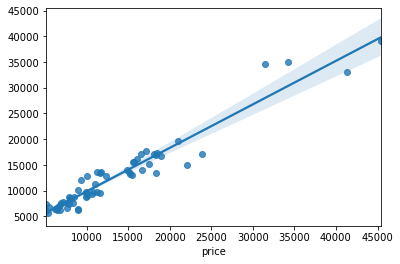

In [112]:
sns.regplot(x= y_test, y= y_predictions)

<AxesSubplot:xlabel='price', ylabel='Count'>

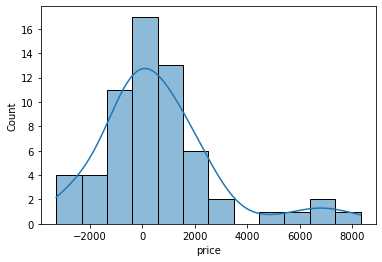

In [113]:
sns.histplot((y_test-y_predictions),kde= True)

 Random forest estimator gave a significant decrease in the RMSE and an increase in R2 which is a good improvement. hpwever the residual plot is still skewed.

# Model 3: ElasticNet

In [114]:
#trying out this model because it is best used when variables form groups that contain highly correlated independent variable
#as seen in out multicollineariy
from sklearn.linear_model import ElasticNet


In [115]:
x = encoded_copy_2.drop(['price',"car_ID","carwidth"], axis=1)
y = encoded_copy_2['price']

In [116]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [117]:
#Building the model
enet = ElasticNet(alpha = 1.0, l1_ratio =0.5)
enet.fit(x_train,y_train)


ElasticNet()

In [118]:
y_pred = enet.predict(x_test)



In [119]:
y_pred

array([ 5455.93917009, 19546.91952669, 15748.35502079,  -213.10816697,
       11112.61910497, 15386.23785091,  6097.97918456,  7175.19051953,
       21922.65540683,  8230.08331172, 17051.32224418, 29601.44053151,
       10316.86236638, 13883.57394407,  5867.0331675 , 14301.90582335,
       13099.08684207, 17315.18713607, 10504.50846962,  5678.40659158,
       10499.71156529, 15409.41390651, 12794.38577334, 15280.53160495,
       20811.23681545,  6789.08360985,  6255.33596158, 15286.15467651,
        6061.56988781,  6125.38685427, 10175.16934134, 11418.04902465,
       19038.35835511,  7834.63438815,  6436.72772282, 27449.74915667,
       11880.59676436, 14293.65229498,  6124.33369597, 35868.38040853,
        5903.41733716, 17935.76749285, 29214.2050802 , 13500.90586895,
       10314.31732162,  8775.82973595,  7211.42087016, 16813.35717863,
       10146.33142309, 10588.57547545, 17634.95706695,  4478.68500388,
        7594.8823773 , 10076.02074277, 16023.29582074, 21631.15056819,
      

In [120]:
print("Slope: %.2f" %enet.coef_[0])

Slope: 263.67


In [121]:
print("intercept: %.2f" % enet.intercept_)

intercept: -25310.40


In [122]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


10869855.74255593

In [123]:
np.sqrt(mean_squared_error(y_test, y_pred))

3296.9464270072585

In [124]:
r2_score(y_test, y_pred)

0.8353984166547328

<AxesSubplot:xlabel='price'>

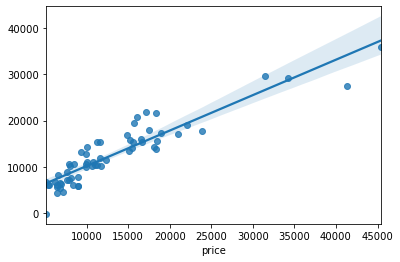

In [125]:
sns.regplot(x= y_test, y= y_pred)

<AxesSubplot:xlabel='price', ylabel='Count'>

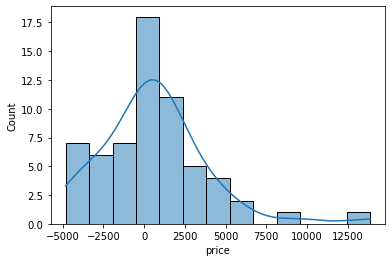

In [126]:
sns.histplot((y_test-y_pred),kde= True)

# Feature Importance

In [127]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestRegressor(n_estimators=10, random_state=0)
classifier.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [128]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",max_depth= None, max_features="auto", max_leaf_nodes=None,
                      min_impurity_decrease=0.0,min_impurity_split="None",min_samples_leaf=1,min_samples_split=2,
                       min_weight_fraction_leaf=0.0,n_estimators=100, n_jobs=1, oob_score= False, random_state=None, verbose=0,
                      warm_start=False)

RandomForestClassifier(min_impurity_split='None', n_jobs=1)

In [129]:
importances= classifier.feature_importances_
sorted_indices=np.argsort(importances)[:: -1]
feat_labels= encoded_copy_2.columns[1:]
for f in range(x_train.shape[1]):
    print("%2d) %- *s %f" %(f + 1, 30, feat_labels[sorted_indices[f]], importances[sorted_indices[f]]))

 1) curbweight                     0.716022
 2) carheight                      0.180511
 3) compressionratio               0.010155
 4) wheelbase                      0.009917
 5) citympg                        0.009486
 6) peakrpm                        0.009135
 7) boreratio                      0.009025
 8) horsepower                     0.006916
 9) drivewheel_4wd                 0.004921
10) enginesize                     0.004863
11) enginetype_dohcv               0.004149
12) car_company_alfa-romero        0.003971
13) stroke                         0.003950
14) carlength                      0.003246
15) price                          0.003084
16) fueltype_diesel                0.002874
17) cylindernumber_five            0.002665
18) carwidth                       0.002258
19) fuelsystem_idi                 0.002128
20) enginelocation_front           0.001886
21) cylindernumber_eight           0.001494
22) symboling                      0.001459
23) carbody_hardtop             

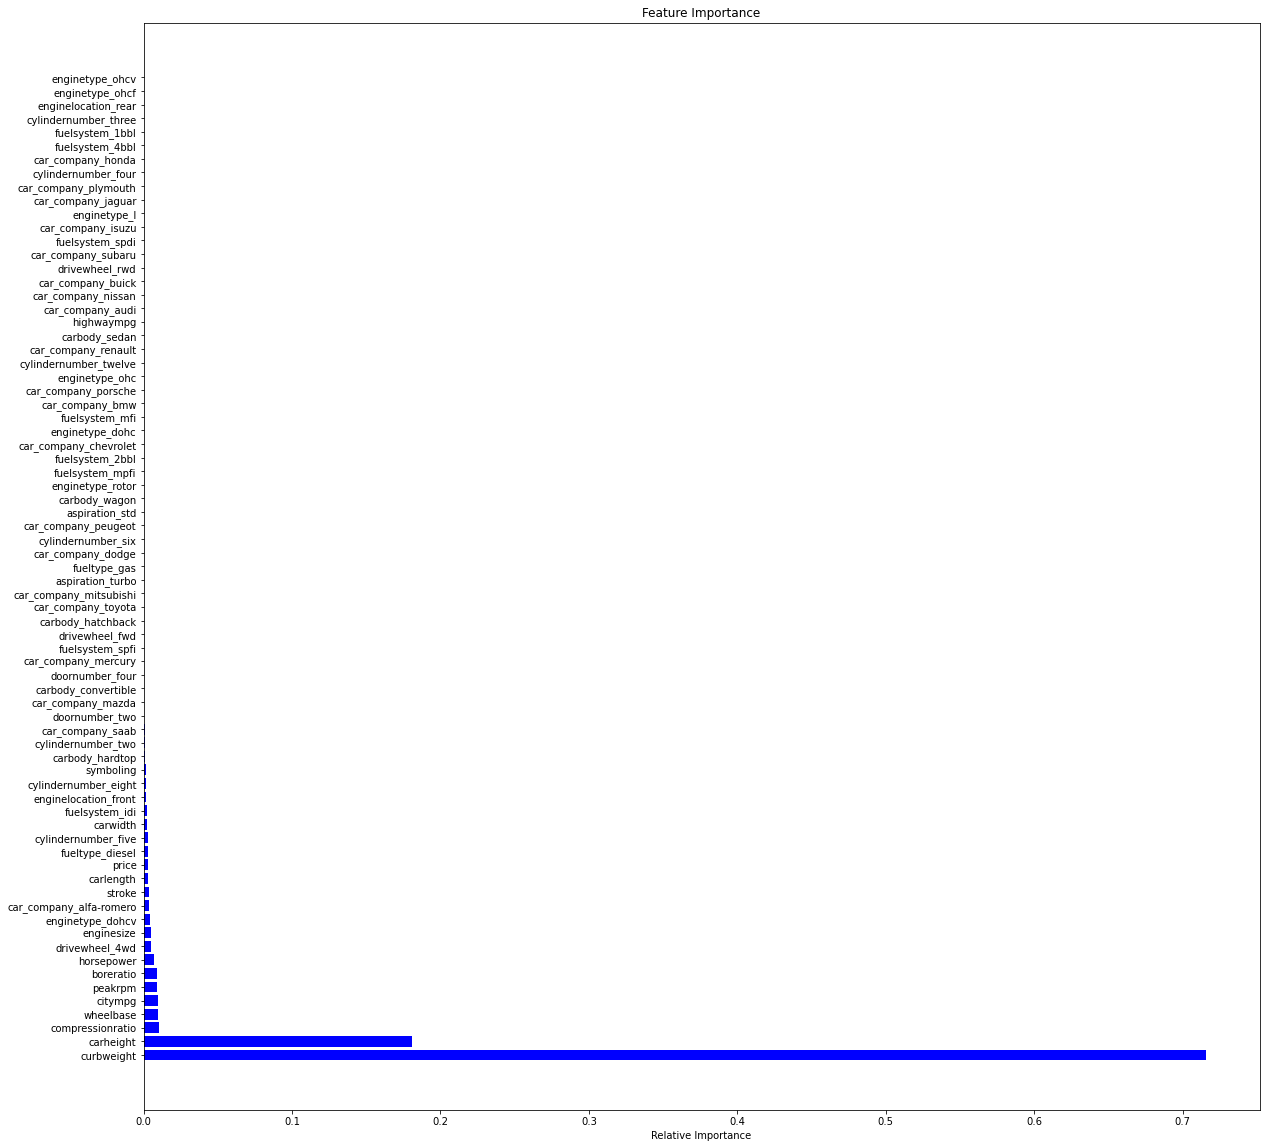

In [130]:
plt.figure(figsize=(20,20))
plt.title("Feature Importance")
plt.barh(range(len(sorted_indices)), importances[sorted_indices],color="blue",align="center")
plt.yticks(range(len(sorted_indices)), [feat_labels[f] for f in sorted_indices])
plt.xlabel("Relative Importance")
plt.show()

feature importance shows  Compresionratio, boreratio, wheelbase, horsepower, carheight and curbweight are the important feature in predicting the car price.

# Predicting Using Only Important Features

# Linear Regression Model

In [131]:
#linear regression.
x = encoded_copy_2[["compressionratio","boreratio","wheelbase","horsepower","carheight","curbweight"]]
y = encoded_copy_2['price']

In [132]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [133]:
scaler = StandardScaler()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.25991291,  0.51907138, -1.90190628,  0.32486678, -2.0204173 ,
        -0.01456628],
       [-0.25991291,  0.51907138, -1.90190628,  0.32486678, -2.0204173 ,
        -0.01456628],
       [-0.25991291, -2.40488029, -0.72190928,  1.64786235, -0.54352748,
         0.51488192],
       ...,
       [-0.61119903,  0.9262039 ,  2.19808329,  1.03251557,  0.72823876,
         0.87875722],
       [ 0.51201129, -1.18348276,  2.19808329,  0.17103009,  0.72823876,
         1.27343679],
       [ 0.61830237,  1.66644483,  2.19808329,  0.4171688 ,  0.72823876,
         0.97502053]])

In [134]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [135]:
print(model.intercept_)
print(model.coef_)

20249.398103590596
[-914.7222114  1294.24013462 -153.18216774   23.69896561 -420.4417471
   12.59062522]


In [136]:
print(model.score(x_train,y_train))

0.7271583807327878


In [137]:
predictions = model.predict(x_test)

In [138]:
predictions

array([ 4527.95817321, 20682.78264412, 13161.43185949,  -710.62801526,
        8235.90634342, 15970.89963575,  5543.64147317,  6758.55751894,
       24032.2996544 ,  5358.72184222, 14956.9799792 , 24678.02256784,
       12867.94126479, 12086.45740947,  4745.35791253, 14359.29960807,
       13444.32430868, 16777.19978232,  9092.8793443 ,  5230.1676211 ,
       13087.76894145, 17643.97370751, 13922.1161193 , 16411.57151832,
       20138.0899841 ,  7217.16687281,  7062.59684974, 21740.55388387,
        7662.90083303,  3756.99533329,  7649.39717601, 11954.97572769,
       19442.66160334,  9273.24290738,  4373.93596889, 26054.21849184,
        9262.78548885, 16977.68354756,  5014.83521409, 30606.13548812,
        4304.68602996, 17285.25875738, 29014.84605758, 12952.42532226,
       14435.58370089,  8980.88215723,  6521.66421295, 20035.33737227,
       15961.32439969,  8480.37844029, 19171.3329639 ,  4320.33922967,
        8522.56716889, 11077.49540255, 19837.87011483, 23678.323044  ,
      

In [139]:
score=r2_score(predictions, y_test)
mae= mean_absolute_error(predictions,y_test)
mse= mean_squared_error(predictions,y_test)
rmse=np.sqrt(mse)

In [140]:
print(score)
print(mae)
print(mse)
print(rmse)

0.6305833618095767
3061.092438704606
17765253.22197735
4214.884722264341


<AxesSubplot:xlabel='price'>

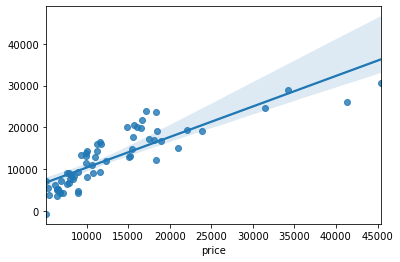

In [141]:
sns.regplot(x= y_test, y= predictions)

<AxesSubplot:xlabel='price', ylabel='Count'>

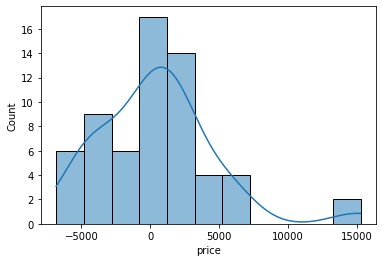

In [142]:
sns.histplot((y_test-predictions),kde= True)

# Random Forest Regressor Model

In [143]:
x = encoded_copy_2[["compressionratio","boreratio","wheelbase","horsepower","carheight","curbweight"]]
y = encoded_copy_2['price']

In [144]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [145]:
scaler = StandardScaler()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-0.25991291,  0.51907138, -1.90190628,  0.32486678, -2.0204173 ,
        -0.01456628],
       [-0.25991291,  0.51907138, -1.90190628,  0.32486678, -2.0204173 ,
        -0.01456628],
       [-0.25991291, -2.40488029, -0.72190928,  1.64786235, -0.54352748,
         0.51488192],
       ...,
       [-0.61119903,  0.9262039 ,  2.19808329,  1.03251557,  0.72823876,
         0.87875722],
       [ 0.51201129, -1.18348276,  2.19808329,  0.17103009,  0.72823876,
         1.27343679],
       [ 0.61830237,  1.66644483,  2.19808329,  0.4171688 ,  0.72823876,
         0.97502053]])

In [146]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x_train, y_train)
y_predictions= regressor.predict(x_test)

In [147]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_predictions))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_predictions))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))

Mean Absolute Error: 1910.368816666667
Mean Squared Error: 10874777.630777907
Root Mean Squared Error: 3297.692773861432


In [148]:
score=r2_score(y_predictions, y_test)
print(score)

0.7715374594324675


<AxesSubplot:xlabel='price'>

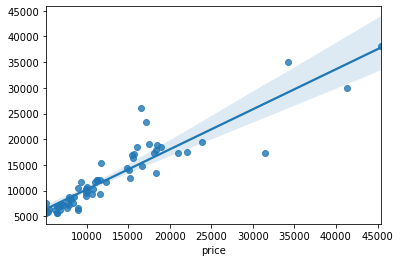

In [149]:
sns.regplot(x= y_test, y= y_predictions)

<AxesSubplot:xlabel='price', ylabel='Count'>

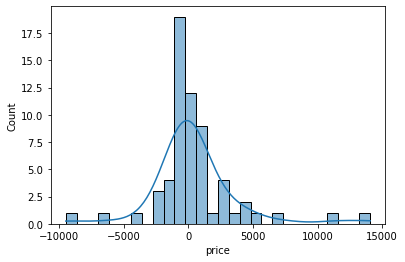

In [150]:
sns.histplot((y_test-y_predictions),kde= True)

predictions using only the important features produces a lower r2 score especially for the linear regression, however the Random forest regressor gave an improved score with a normally distrubuted residual plot which looks good.

# ElasticNet Model

In [151]:
x = encoded_copy_2[["compressionratio","boreratio","wheelbase","horsepower","carheight","curbweight"]]
y = encoded_copy_2['price']

In [152]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [153]:
enet = ElasticNet(alpha = 1.0, l1_ratio =0.5)
enet.fit(x_train,y_train)

ElasticNet()

In [154]:
y_pred = enet.predict(x_test)

In [155]:
y_pred

array([ 4593.87850921, 21126.45197421, 12928.40336994,  -407.31039856,
        9007.33567697, 15659.29399325,  5669.77851695,  7169.61199669,
       23886.98920074,  5617.60398661, 15034.51283901, 24267.29985437,
       12685.38690661, 12482.28326532,  5013.29794665, 14035.85644583,
       13071.61039818, 16763.69620941,  9072.12471995,  5274.04324016,
       12987.14249002, 17250.01747756, 13189.22105146, 16103.20269762,
       20501.92943766,  6563.5041802 ,  6875.33991792, 21389.68545446,
        7464.57705512,  3942.88099045,  7749.27122403, 12051.01440424,
       18891.28955992,  9029.36457322,  4564.35317657, 25507.49852855,
        9100.39080075, 17132.23858839,  5137.08807171, 30024.00524505,
        4569.38924228, 16905.70680953, 28946.69263817, 14208.99819882,
       13321.37515728,  9132.26641105,  6639.50882933, 20299.13617478,
       14904.88838305,  8586.35620941, 19297.30029165,  4961.81372019,
        8316.72644722, 10562.62372233, 19102.94253246, 23519.58406702,
      

In [156]:
print("Slope: %.2f" %enet.coef_[0])

Slope: -330.28


In [157]:
print("intercept: %.2f" % enet.intercept_)

intercept: 14366.51


In [158]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


17405771.596110113

In [159]:
np.sqrt(mean_squared_error(y_test, y_pred))

4172.022482694708

In [160]:
r2_score(y_test, y_pred)

0.7364254290101439

<AxesSubplot:xlabel='price'>

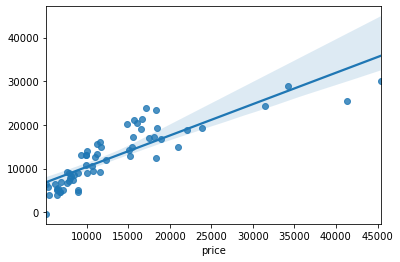

In [161]:
sns.regplot(x= y_test, y= y_pred)

<AxesSubplot:xlabel='price', ylabel='Count'>

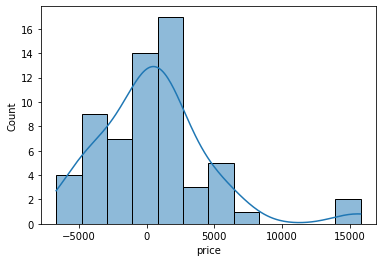

In [162]:
sns.histplot((y_test-y_pred),kde= True)